# Task-3 : Kalman Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
readings_file = open('kalmann.txt', 'r')

#get lines from kalman text file
lines = readings_file.readline()

#list of liness
l1 = lines.split(',')

#readings list - first line
readings = ([[float(num) for num in line.split(',')] for line in readings_file if line!= lines[0]])

#convert readings list to matrix
readings_matrix = np.array(readings)

#to store initial x coordinates
x1 = np.array([float(x) for x in l1])
#since velx, vely values in the starting is 0, appending [0,0]
x2 = np.append(x1, [0, 0])
#intial state X as vector (dim = 4)
X = np.matrix(x2).T

print('Initial state vector:')
print(X)
print('\n')
print('Readings matrix:')
print(readings_matrix)

Initial state vector:
[[3.72998151e+02]
 [3.68680447e-06]
 [0.00000000e+00]
 [0.00000000e+00]]


Readings matrix:
[[ 3.68189316e+02  6.59661061e+00 -9.90697001e-02  6.36159915e+00]
 [ 3.69507932e+02  1.26879904e+01 -2.98078966e-01  6.39653835e+00]
 [ 3.77056300e+02  1.97931984e+01 -4.98539844e-01  6.33984688e+00]
 ...
 [ 3.68359065e+02 -2.05790410e+01  7.32473010e-01  6.40246046e+00]
 [ 3.62376060e+02 -1.42732937e+01  5.30701946e-01  6.54488403e+00]
 [ 3.72546709e+02 -7.56421232e+00  3.25604234e-01  6.00395252e+00]]


In [3]:
#initialize Process Covariance matrix
P = np.diag((1000, 1000, 1000, 1000))

#time interval between succesive readings = 1
dt = 1

#state transition matrix
A = np.matrix([[1.0, 0.0, dt, 0.0],
              [0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])

#measurement matrix
H = np.identity(4)

I = np.identity(4)

#For matrices Q and R, adjusted values till the final curve was smooth. 

#Process noise covariance matrix 
Q = np.diag((0.0001, 0.0001, 0.0001, 0.0001))

#Measurement noise covariance matrix
R = np.diag((0.1, 0.1, 0.1, 0.1))


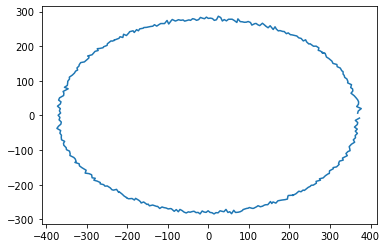

In [4]:
#plot measurements
x_coord = readings_matrix[:,0]
y_coord = readings_matrix[:,1]
plt.plot(x_coord,y_coord)

In [5]:
#to strore predicted x and y coordinates
xt = []
yt = []

def savestates(X):
    xt.append(X[0,0])
    yt.append(X[1,0])

savestates(X)

In [7]:
def Kalman(x, P):
    #initial X matrix
    X = np.matrix(x2).T
    #number of iteration count
    count = 0
    #iterate through readings matrix
    for i in range(len(readings_matrix)):
        count += 1
        #predict new state and process covariance matix (X, P)
        X = A*X
        P = A*P*A.T + Q
        
        #Get next sensor reading
        Z = np.matrix(readings_matrix[i])
        
        #'Difference' between prediction and sensor reading
        Y = Z.T - (H*X)
        
        #denominator of Kalman gain
        D = H*P*H.T + R
        
        #Kalman gain
        K = P*H.T*(np.linalg.pinv(D))
        
        #update new state and process covariance matrix
        X = X + (K*Y)
        P = (I - (K*H))*P
        
        #save this state
        savestates(X)

        print(f'Iteration number = {count}')
        print(f'X coordinate updated = {X[0,0]}\nY coordinate updated = {X[1,0]}')
        print(f'Velocity in x direction = {X[2,0]} m/s\nVelocity in y direction = {X[3,0]} m/s\n')

Kalman(X, P)

Iteration number = 1
X coordinate updated = 368.18978655045777
Y coordinate updated = 6.596587053479211
Velocity in x direction = -0.09953063026874301 m/s
Velocity in y direction = 6.3609866087729365 m/s

Iteration number = 2
X coordinate updated = 368.90146267083327
Y coordinate updated = 12.80287533538933
Velocity in x direction = 0.10423848474342784 m/s
Velocity in y direction = 6.32135580954153 m/s

Iteration number = 3
X coordinate updated = 373.18117169935636
Y coordinate updated = 19.48489130702261
Velocity in x direction = 1.5911942286905307 m/s
Velocity in y direction = 6.458689637311783 m/s

Iteration number = 4
X coordinate updated = 369.84586459928147
Y coordinate updated = 25.78075866143315
Velocity in x direction = -0.17893297590233037 m/s
Velocity in y direction = 6.398229102046107 m/s

Iteration number = 5
X coordinate updated = 369.7521090916179
Y coordinate updated = 32.12983331198519
Velocity in x direction = -0.17646583817674028 m/s
Velocity in y direction = 6.38342

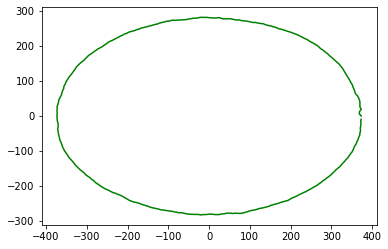

In [8]:
#After Kalman filter
plt.plot(xt,yt, color = 'green')


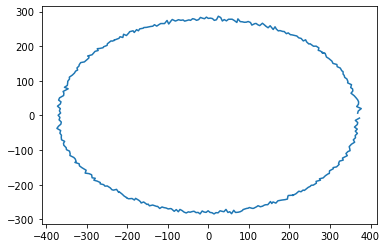

In [9]:
#Before kalman filter 
plt.plot(x_coord, y_coord)